In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
projdir = '/u/home/t/terencew/project-cluo/igvf/pilot/multiome'
donors = np.loadtxt(f'{projdir}/txt/donors.txt', dtype=str)
samples = np.loadtxt(f'{projdir}/txt/samples.txt', dtype=str)
s = samples[0]

In [3]:
prop_doub = np.loadtxt(f'{projdir}/ambient/ambisim/prop_doub/txt/experiments.txt', dtype=str)
mux_test = np.loadtxt(f'{projdir}/ambient/ambisim/mux_test/txt/experiments.txt', dtype=str)

gex_methods = ['demuxlet', 'freemuxlet', 'vireo', 'vireo_nogenos',
                    'scsplit', 'scsplit_nogenos', 'souporcell', 'souporcell_nogenos', 'demuxalot']

atac_methods = ['demuxlet', 'freemuxlet', 'vireo', 'vireo_nogenos',
                    'scsplit', 'scsplit_nogenos', 'souporcell', 'souporcell_nogenos', 'scavengers']

In [4]:
props = [0, 10, 20, 30]
props = [str(x) for x in props]

In [5]:
doub_gex_drop_acc = pd.read_csv(f'{projdir}/csv/final_figures/figure2/doub_gex_drop_acc.csv.gz', sep='\t', header=0, index_col=0).transpose()
doub_atac_drop_acc = pd.read_csv(f'{projdir}/csv/final_figures/figure2/doub_atac_drop_acc.csv.gz', sep='\t', header=0, index_col=0).transpose()
mux_gex_drop_acc = pd.read_csv(f'{projdir}/csv/final_figures/figure2/mux_gex_drop_acc.csv.gz', sep='\t', header=0, index_col=0).transpose()
mux_atac_drop_acc = pd.read_csv(f'{projdir}/csv/final_figures/figure2/mux_atac_drop_acc.csv.gz', sep='\t', header=0, index_col=0).transpose()

In [6]:
doub_gex_donor_acc = pd.read_csv(f'{projdir}/csv/final_figures/figure2/doub_gex_donor_acc.csv.gz', sep='\t', header=0, index_col=0).transpose()
doub_atac_donor_acc = pd.read_csv(f'{projdir}/csv/final_figures/figure2/doub_atac_donor_acc.csv.gz', sep='\t', header=0, index_col=0).transpose()
mux_gex_donor_acc = pd.read_csv(f'{projdir}/csv/final_figures/figure2/mux_gex_donor_acc.csv.gz', sep='\t', header=0, index_col=0).transpose()
mux_atac_donor_acc = pd.read_csv(f'{projdir}/csv/final_figures/figure2/mux_atac_donor_acc.csv.gz', sep='\t', header=0, index_col=0).transpose()

In [7]:
medians = np.median(doub_gex_drop_acc, axis=0)
np.max(medians), np.min(medians), \
medians

(0.9987220802311367,
 0.8904878319813313,
 array([0.94910546, 0.95321702, 0.99177686, 0.99555506, 0.99872208,
        0.99749972, 0.90326703, 0.89048783, 0.91771308]))

In [8]:
medians = np.median(doub_atac_drop_acc, axis=0)
np.max(medians), np.min(medians), \
medians

(0.999333259251028,
 0.8507611956884098,
 array([0.97855317, 0.90065563, 0.99472164, 0.99805534, 0.99916657,
        0.99905545, 0.85937326, 0.8507612 , 0.99933326]))

### temporary: fill in the accuracy of missing simulations as median of all methods


In [9]:
fill = 0.95

In [10]:
doub_gex_drop_acc.replace({0 : fill}, inplace=True)
doub_atac_drop_acc.replace({0 : fill}, inplace=True)
mux_gex_drop_acc.replace({0 : fill}, inplace=True)
mux_atac_drop_acc.replace({0 : fill}, inplace=True)

In [11]:
doub_gex_donor_acc.replace({0 : fill}, inplace=True)
doub_atac_donor_acc.replace({0 : fill}, inplace=True)
mux_gex_donor_acc.replace({0 : fill}, inplace=True)
mux_atac_donor_acc.replace({0 : fill}, inplace=True)

In [14]:
doub_atac_donor_acc

,demuxlet,freemuxlet,vireo,vireo_nogenos,souporcell,souporcell_nogenos,scsplit,scsplit_nogenos,scavengers
0_0,1.000000,0.497055,1.0,1.0,1.0,1.0,1.000000,0.835019,0.950000
0_10,1.000000,0.497345,1.0,1.0,1.0,1.0,0.743549,0.744413,1.000000
0_20,1.000000,0.499931,1.0,1.0,1.0,1.0,0.759550,0.740520,0.950000
0_30,1.000000,0.503968,1.0,1.0,1.0,1.0,1.000000,1.000000,0.950000
10_0,1.000000,0.950000,1.0,1.0,1.0,1.0,0.824572,0.846142,1.000000
10_10,1.000000,0.502161,1.0,1.0,1.0,1.0,1.000000,0.750218,1.000000
10_20,1.000000,0.503264,1.0,1.0,1.0,1.0,0.749194,0.748424,1.000000
10_30,1.000000,0.950000,1.0,1.0,1.0,1.0,0.748329,1.000000,1.000000
20_0,0.999883,0.950000,1.0,1.0,1.0,1.0,0.864107,1.000000,1.000000
20_10,0.999869,0.502040,1.0,1.0,1.0,1.0,0.745532,0.738903,1.000000


### plot

In [15]:
doub_gex_drop_acc['amb_prop'] = [x.split('_')[0] for x in doub_gex_drop_acc.index]
doub_atac_drop_acc['amb_prop'] = [x.split('_')[0] for x in doub_atac_drop_acc.index]
mux_gex_drop_acc['amb_prop'] = [x.split('_')[1] for x in mux_gex_drop_acc.index]
mux_atac_drop_acc['amb_prop'] = [x.split('_')[1] for x in mux_atac_drop_acc.index]

doub_gex_drop_acc['doub_prop'] = [x.split('_')[1] for x in doub_gex_drop_acc.index]
doub_atac_drop_acc['doub_prop'] = [x.split('_')[1] for x in doub_atac_drop_acc.index]
mux_gex_drop_acc['donors'] = [x.split('_')[0] for x in mux_gex_drop_acc.index]
mux_atac_drop_acc['donors'] = [x.split('_')[0] for x in mux_atac_drop_acc.index]

In [16]:
doub_gex_donor_acc['amb_prop'] = [x.split('_')[0] for x in doub_gex_donor_acc.index]
doub_atac_donor_acc['amb_prop'] = [x.split('_')[0] for x in doub_atac_donor_acc.index]
mux_gex_donor_acc['amb_prop'] = [x.split('_')[1] for x in mux_gex_donor_acc.index]
mux_atac_donor_acc['amb_prop'] = [x.split('_')[1] for x in mux_atac_donor_acc.index]

doub_gex_donor_acc['doub_prop'] = [x.split('_')[1] for x in doub_gex_donor_acc.index]
doub_atac_donor_acc['doub_prop'] = [x.split('_')[1] for x in doub_atac_donor_acc.index]
mux_gex_donor_acc['donors'] = [x.split('_')[0] for x in mux_gex_donor_acc.index]
mux_atac_donor_acc['donors'] = [x.split('_')[0] for x in mux_atac_donor_acc.index]

### new: take average accuracy

In [17]:
tmp_means = [doub_gex_drop_acc[doub_gex_drop_acc['amb_prop'] == prop].mean() for prop in props]
doub_gex_drop_means = pd.concat(tmp_means, axis=1).iloc[:-2, :]
doub_gex_drop_means.columns = props

tmp_means = [doub_atac_drop_acc[doub_atac_drop_acc['amb_prop'] == prop].mean() for prop in props]
doub_atac_drop_means = pd.concat(tmp_means, axis=1).iloc[:-2, :]
doub_atac_drop_means.columns = props

tmp_means = [mux_gex_drop_acc[mux_gex_drop_acc['amb_prop'] == prop].mean() for prop in props]
mux_gex_drop_means = pd.concat(tmp_means, axis=1).iloc[:-2, :]
mux_gex_drop_means.columns = props

tmp_means = [mux_atac_drop_acc[mux_atac_drop_acc['amb_prop'] == prop].mean() for prop in props]
mux_atac_drop_means = pd.concat(tmp_means, axis=1).iloc[:-2, :]
mux_atac_drop_means.columns = props

In [18]:
tmp_means = [doub_gex_donor_acc[doub_gex_donor_acc['amb_prop'] == prop].mean() for prop in props]
doub_gex_donor_means = pd.concat(tmp_means, axis=1).iloc[:-2, :]
doub_gex_donor_means.columns = props

tmp_means = [doub_atac_donor_acc[doub_atac_donor_acc['amb_prop'] == prop].mean() for prop in props]
doub_atac_donor_means = pd.concat(tmp_means, axis=1).iloc[:-2, :]
doub_atac_donor_means.columns = props

tmp_means = [mux_gex_donor_acc[mux_gex_donor_acc['amb_prop'] == prop].mean() for prop in props]
mux_gex_donor_means = pd.concat(tmp_means, axis=1).iloc[:-2, :]
mux_gex_donor_means.columns = props

tmp_means = [mux_atac_donor_acc[mux_atac_donor_acc['amb_prop'] == prop].mean() for prop in props]
mux_atac_donor_means = pd.concat(tmp_means, axis=1).iloc[:-2, :]
mux_atac_donor_means.columns = props

In [19]:
doub_gex_drop_means['method'] = doub_gex_drop_means.index
doub_atac_drop_means['method'] = doub_atac_drop_means.index
mux_gex_drop_means['method'] = mux_gex_drop_means.index
mux_atac_drop_means['method'] = mux_atac_drop_means.index

In [20]:
doub_gex_donor_means['method'] = doub_gex_donor_means.index
doub_atac_donor_means['method'] = doub_atac_donor_means.index
mux_gex_donor_means['method'] = mux_gex_donor_means.index
mux_atac_donor_means['method'] = mux_atac_donor_means.index

In [21]:
final_doub_gex_drop = doub_gex_drop_means.melt(id_vars = 'method', value_vars = doub_gex_drop_means.columns[:-1])
final_doub_atac_drop = doub_atac_drop_means.melt(id_vars = 'method', value_vars = doub_atac_drop_means.columns[:-1])
final_mux_gex_drop = mux_gex_drop_means.melt(id_vars = 'method', value_vars = mux_gex_drop_means.columns[:-1])
final_mux_atac_drop = mux_atac_drop_means.melt(id_vars = 'method', value_vars = mux_atac_drop_means.columns[:-1])

In [22]:
final_doub_gex_donor = doub_gex_donor_means.melt(id_vars = 'method', value_vars = doub_gex_donor_means.columns[:-1])
final_doub_atac_donor = doub_atac_donor_means.melt(id_vars = 'method', value_vars = doub_atac_donor_means.columns[:-1])
final_mux_gex_donor = mux_gex_donor_means.melt(id_vars = 'method', value_vars = mux_gex_donor_means.columns[:-1])
final_mux_atac_donor = mux_atac_donor_means.melt(id_vars = 'method', value_vars = mux_atac_donor_means.columns[:-1])

In [23]:
final_doub_gex_drop.rename(columns={'variable' : 'amb_prop'}, inplace=True)
final_doub_atac_drop.rename(columns={'variable' : 'amb_prop'}, inplace=True)
final_mux_gex_drop.rename(columns={'variable' : 'amb_prop'}, inplace=True)
final_mux_atac_drop.rename(columns={'variable' : 'amb_prop'}, inplace=True)

In [24]:
final_doub_gex_donor.rename(columns={'variable' : 'amb_prop'}, inplace=True)
final_doub_atac_donor.rename(columns={'variable' : 'amb_prop'}, inplace=True)
final_mux_gex_donor.rename(columns={'variable' : 'amb_prop'}, inplace=True)
final_mux_atac_donor.rename(columns={'variable' : 'amb_prop'}, inplace=True)

In [25]:
final_doub_gex_drop.head()

,method,amb_prop,value
0,demuxlet,0,0.993972
1,freemuxlet,0,0.970747
2,vireo,0,1.000000
3,vireo_nogenos,0,0.999972
4,souporcell,0,1.000000


In [29]:
final_doub_atac_donor

,method,amb_prop,value
0,demuxlet,0,1.000000
1,freemuxlet,0,0.499575
2,vireo,0,1.000000
3,vireo_nogenos,0,1.000000
4,souporcell,0,1.000000
5,souporcell_nogenos,0,1.000000
6,scsplit,0,0.875775
7,scsplit_nogenos,0,0.829988
8,scavengers,0,0.962500
9,demuxlet,10,1.000000


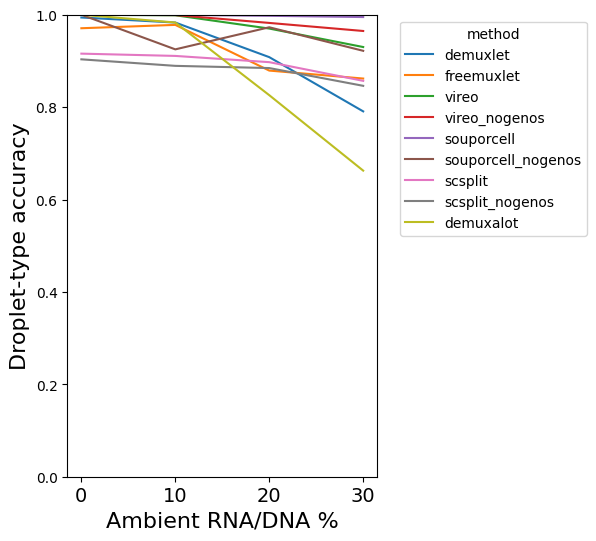

In [66]:
fig, ax = plt.subplots(1, figsize=(4, 6))

x_lab = 'amb_prop'
y_lab = 'value'
hue = 'method'

ax = sns.lineplot(data=final_doub_gex_drop, x=x_lab, y=y_lab, hue=hue)

ax.set_xlabel('Ambient RNA/DNA %', fontsize=16)
ax.set_ylabel('Droplet-type accuracy', fontsize=16)
ax.tick_params(axis='x', labelsize=14, labelrotation=0)
ax.set_ylim((0, 1))

sns.move_legend(ax, "upper left", bbox_to_anchor=(1.05, 1))

In [67]:
outdir = f'{projdir}/csv/final_figures/figure2/'

final_doub_gex_drop.to_csv(f'{outdir}/doub_gex_drop_mean.csv.gz', sep='\t', header=True, index=True)
final_doub_atac_drop.to_csv(f'{outdir}/doub_atac_drop_mean.csv.gz', sep='\t', header=True, index=True)
final_mux_gex_drop.to_csv(f'{outdir}/mux_gex_drop_mean.csv.gz', sep='\t', header=True, index=True)
final_mux_atac_drop.to_csv(f'{outdir}/mux_atac_drop_mean.csv.gz', sep='\t', header=True, index=True)

final_doub_gex_donor.to_csv(f'{outdir}/doub_gex_donor_mean.csv.gz', sep='\t', header=True, index=True)
final_doub_atac_donor.to_csv(f'{outdir}/doub_atac_donor_mean.csv.gz', sep='\t', header=True, index=True)
final_mux_gex_donor.to_csv(f'{outdir}/mux_gex_donor_mean.csv.gz', sep='\t', header=True, index=True)
final_mux_atac_donor.to_csv(f'{outdir}/mux_atac_donor_mean.csv.gz', sep='\t', header=True, index=True)